In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [31]:
sns.set(rc={'figure.figsize':(12,7)}, palette='RdBu', style="whitegrid")

In [3]:
films = pd.read_csv('flixpatrol.csv')

In [4]:
films.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3.0,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4.0,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M


In [5]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  18164 non-null  float64
 1   Title                 18164 non-null  object 
 2   Type                  18164 non-null  object 
 3   Premiere              18030 non-null  float64
 4   Genre                 17984 non-null  object 
 5   Watchtime             18164 non-null  object 
 6   Watchtime in Million  18164 non-null  object 
dtypes: float64(2), object(5)
memory usage: 993.5+ KB


In [6]:
films.nunique()

Rank                    18164
Title                   14509
Type                        2
Premiere                   73
Genre                      28
Watchtime                 710
Watchtime in Million      710
dtype: int64

In [7]:
films.isna().sum()

Rank                      0
Title                     0
Type                      0
Premiere                134
Genre                   180
Watchtime                 0
Watchtime in Million      0
dtype: int64

Сменим тип данных для кол-ва просмотров.

In [8]:
films['Watchtime'] = films['Watchtime'].str.replace(',', '').apply(pd.to_numeric, errors="coerce")

Приведем годы в нормальный вид. Для этого заполним пропуски 0 и избавимся от десятичной части.

In [9]:
films['Premiere'] = films['Premiere'].fillna(0).astype('int')

Также заполним пропуски в жанрах.

In [10]:
films['Genre'] = films['Genre'].fillna('Unknown')

Посмотрим на дубликаты в названиях.

In [11]:
films[films['Title'].duplicated()].head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
8,9.0,Ginny & Georgia,TV Show,2021,Drama,302100000,302.1M
26,27.0,Outer Banks,TV Show,2020,Drama,184000000,184.0M
41,42.0,Outer Banks,TV Show,2020,Drama,153900000,153.9M
45,46.0,Manifest,TV Show,2018,Thriller,151400000,151.4M
46,47.0,Alchemy of Souls,TV Show,2022,Fantasy,150200000,150.2M


In [12]:
films.query('Title=="Ginny & Georgia"')

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
1,2.0,Ginny & Georgia,TV Show,2021,Drama,665100000,665.1M
8,9.0,Ginny & Georgia,TV Show,2021,Drama,302100000,302.1M


Некоторые фильмы/сериалы дублируют всю информацию, кроме рейтинга и времени просмотра. 
Создадим новый датафрейм, где объединим данные для одинаковых наименований.
Также проранжируем фильмы/сериалы исходя из времени просмотра. 

In [13]:
new_films_df = films.groupby(['Title', 'Type', 'Premiere', 'Genre'], as_index=False).agg({'Watchtime':'sum'})
new_films_df['Rank'] = new_films_df['Watchtime'].rank(method='dense', ascending=False)
new_films_df.insert(0, 'Rank', new_films_df.pop('Rank'))

In [14]:
new_films_df['Watchtime in Million'] = new_films_df.Watchtime / 1000000
new_films_df['Watchtime in Million'] = new_films_df['Watchtime in Million'].astype('str') + 'M'

In [15]:
new_films_df.sort_values('Rank').head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
4432,1.0,Ginny & Georgia,TV Show,2021,Drama,967200000,967.2M
12580,2.0,The Night Agent,TV Show,2023,Action,812100000,812.1M
14681,3.0,You,TV Show,2018,Crime,766300000,766.3M
8774,4.0,Outer Banks,TV Show,2020,Drama,740400000,740.4M
13224,5.0,The Walking Dead,TV Show,2010,Horror,738600000,738.6M


-----

### Визуализации

**1. Countplot: Подсчет шоу по жанрам**

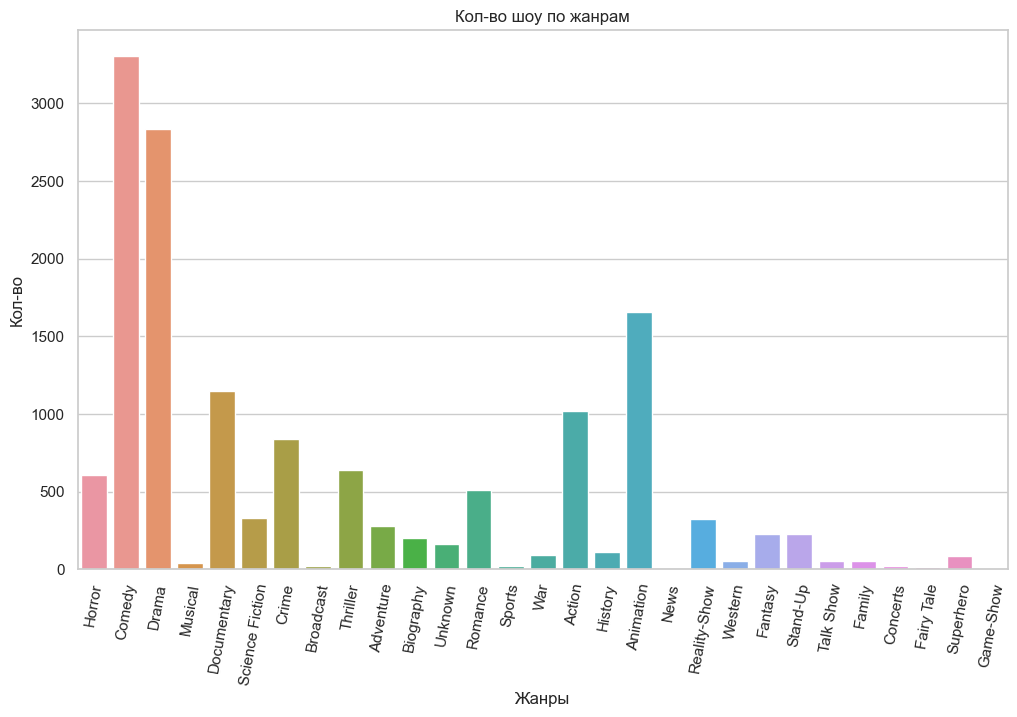

In [32]:
sns.countplot(data=new_films_df, x='Genre')
plt.xticks(rotation=80)
plt.title('Кол-во шоу по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Кол-во')
plt.show()

**2. Barplot: Топ шоу по времени просмотра.**

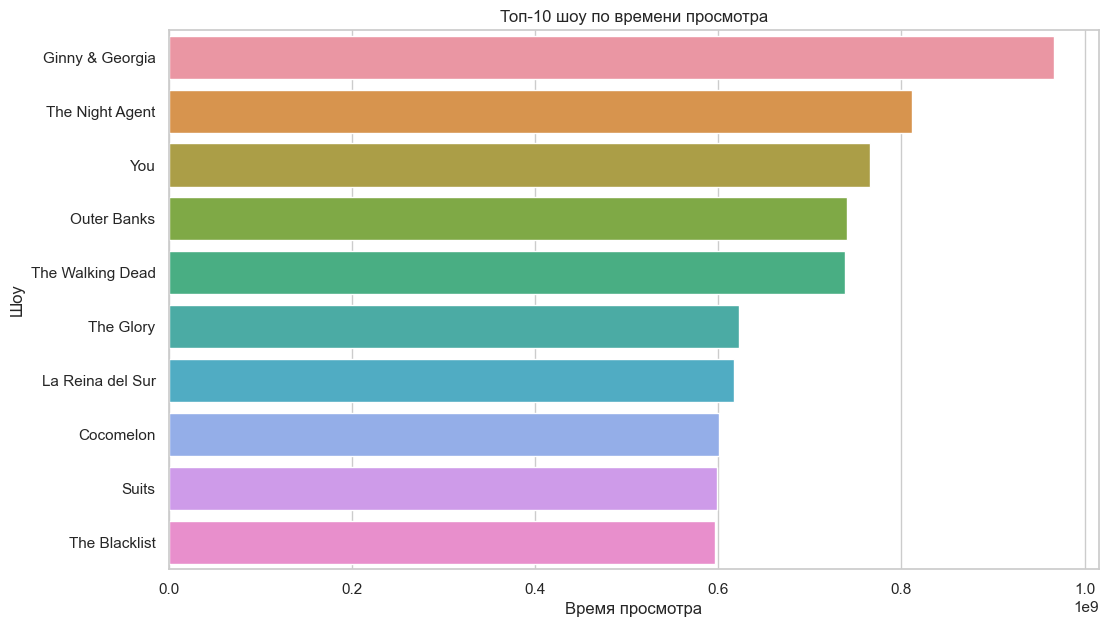

In [33]:
sns.barplot(data=new_films_df.sort_values('Watchtime', ascending=False).head(10), y='Title', x='Watchtime')
plt.title('Топ-10 шоу по времени просмотра')
plt.ylabel('Шоу')
plt.xlabel('Время просмотра')
plt.show()

**3. Boxplot: Время просмотра по жанрам.**

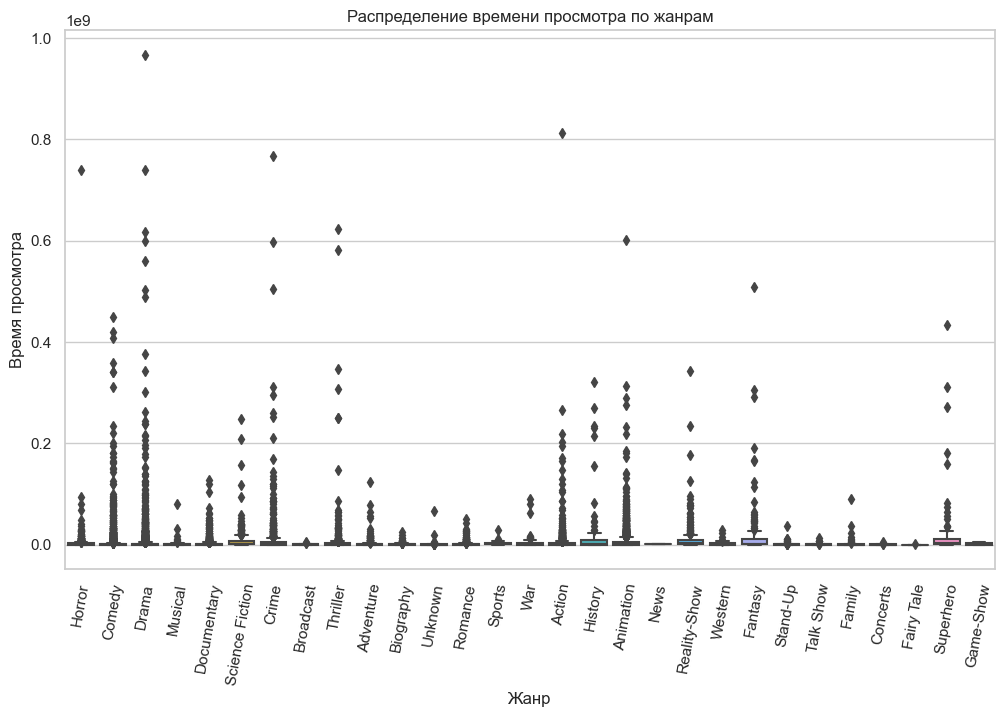

In [34]:
sns.boxplot(data=new_films_df, x='Genre', y='Watchtime')
plt.xticks(rotation=80)
plt.title('Распределение времени просмотра по жанрам')
plt.ylabel('Время просмотра')
plt.xlabel('Жанр')
plt.show()

**4. Scatterplot: Год премьеры и время просмотра.**

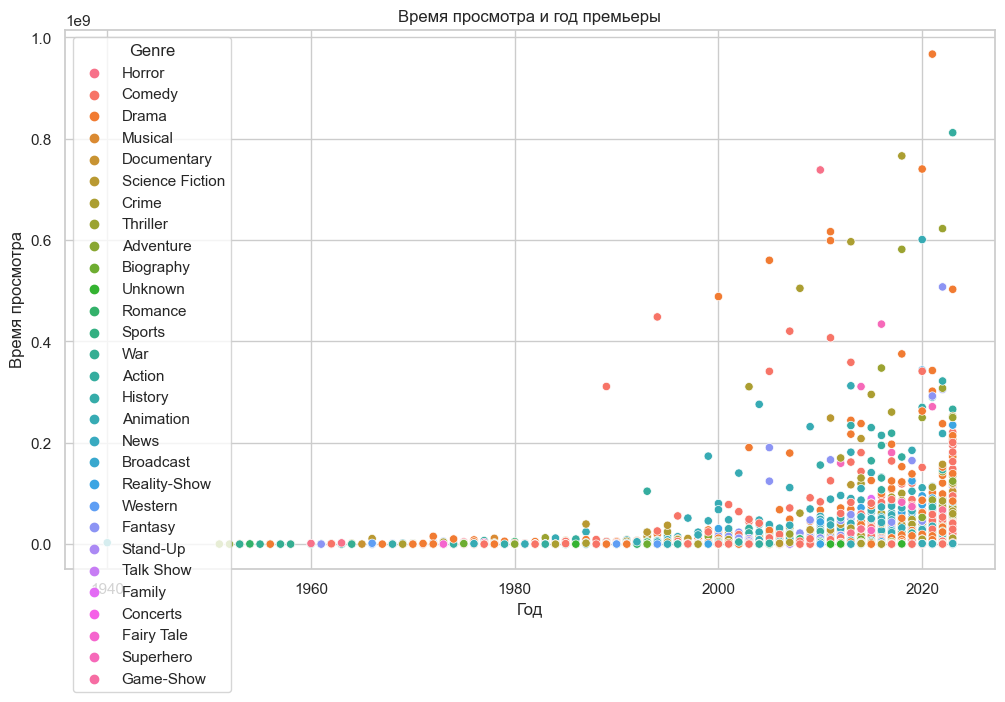

In [35]:
sns.scatterplot(data=new_films_df.query('Premiere>0'), x='Premiere', y='Watchtime', hue='Genre')
plt.title('Время просмотра и год премьеры')
plt.ylabel('Время просмотра')
plt.xlabel('Год')
plt.show()

**5.Lineplot: Время просмотра.** 

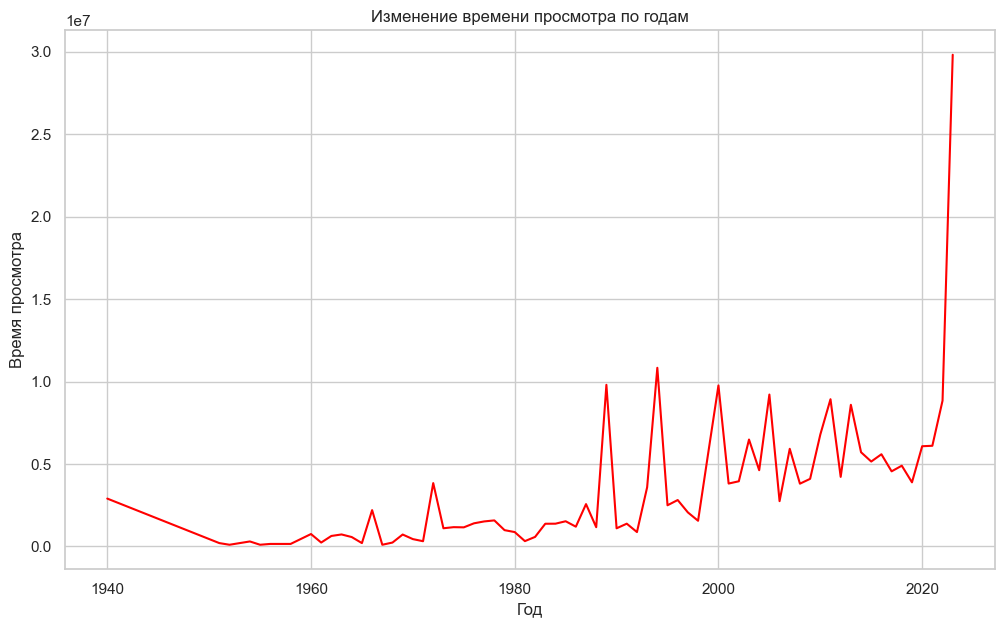

In [20]:
sns.lineplot(data=new_films_df.query('Premiere>0'), x='Premiere', y='Watchtime', color='red', errorbar=None)
plt.title('Изменение времени просмотра по годам')
plt.ylabel('Время просмотра')
plt.xlabel('Год')
plt.show()

**6. Barplot: кол-во шоу каждый год.**

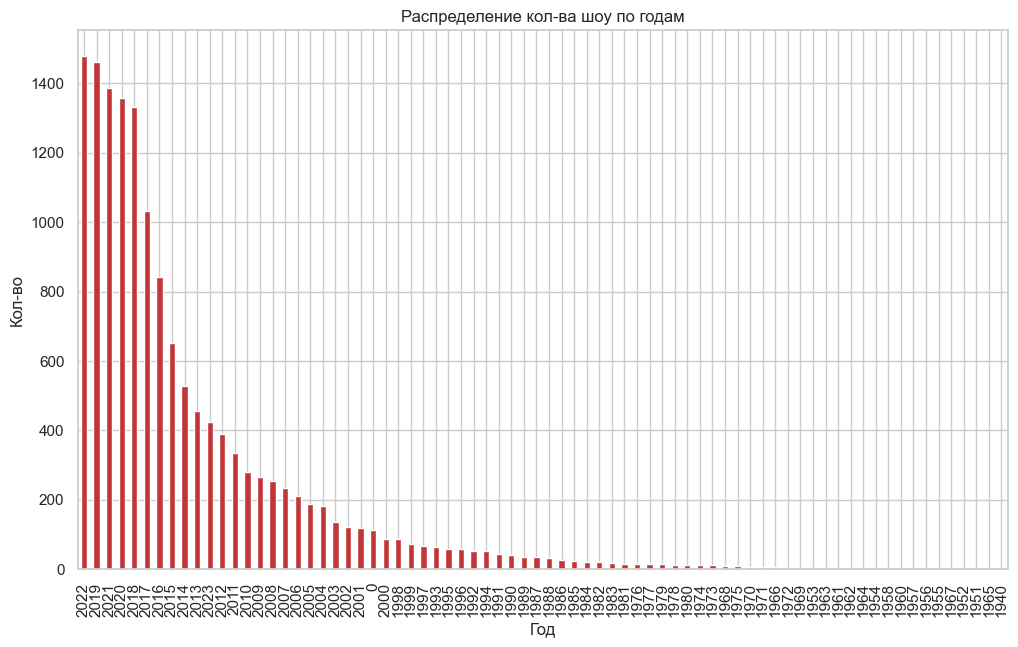

In [36]:
new_films_df['Premiere'].value_counts().plot(kind='bar')
plt.title('Распределение кол-ва шоу по годам')
plt.ylabel('Кол-во')
plt.xlabel('Год')
plt.show()

**7. Pie chart: жанры.**

In [21]:
genre_count = new_films_df['Genre'].value_counts()

In [37]:
fig = px.pie(names=genre_count.index, values=genre_count.values, title='Распределение жанров')
fig.show()

**8. Histplot: жанры шоу и типы.**

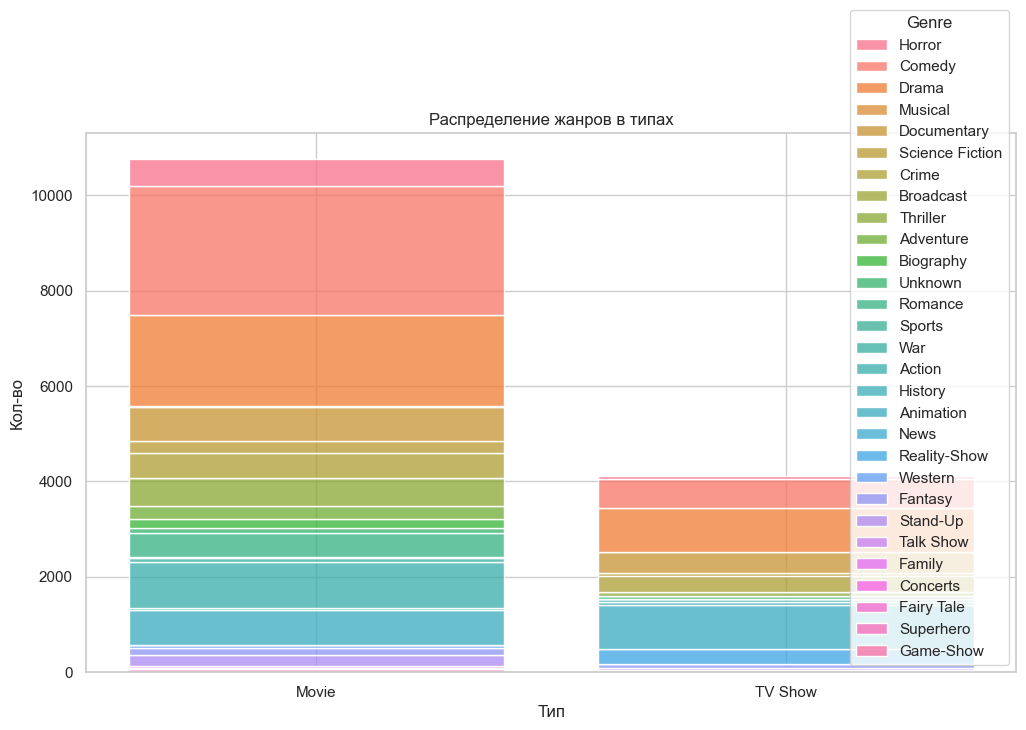

In [38]:
sns.histplot(data=new_films_df, x='Type', hue='Genre', multiple='stack', shrink=.8)
plt.title('Распределение жанров в типах')
plt.ylabel('Кол-во')
plt.xlabel('Тип')
plt.show()

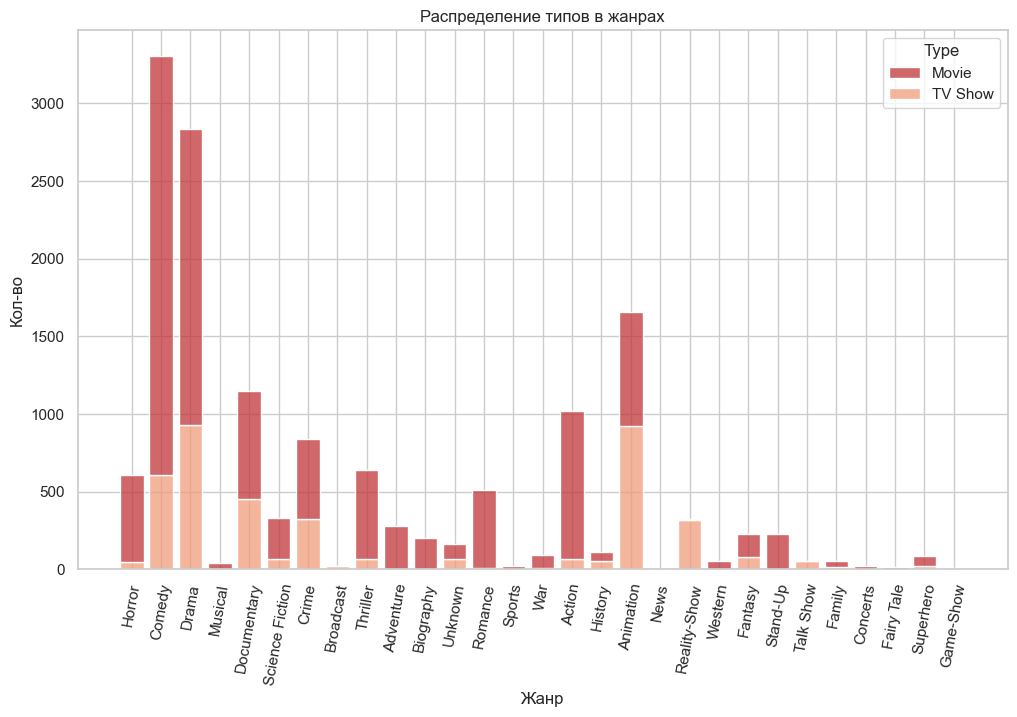

In [41]:
sns.histplot(data=new_films_df, x='Genre', hue='Type', multiple='stack', shrink=.8)
plt.xticks(rotation=80)
plt.title('Распределение типов в жанрах')
plt.ylabel('Кол-во')
plt.xlabel('Жанр')
plt.show()